### Data Exploration and other examples

In [1]:
import os
os.chdir('..')

In [2]:
# Import all the packages we need to generate recommendations
import numpy as np
import pandas as pd
import src.utils as utils
import src.recommenders as recommenders
import src.similarity as similarity

# imports necesary for plotting
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

# Enable logging on Jupyter notebook
import logging
logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

In [3]:
# loads dataset 
dataset_folder = os.path.join(os.getcwd(), 'data')
dataset_folder_ready = utils.load_dataset(dataset_folder)

# adds personal ratings to original dataset ratings file.
ratings_file = os.path.join(dataset_folder, 'ml-latest-small','ratings-merged.csv')
[ratings, my_customer_number] = utils.merge_datasets(dataset_folder_ready, ratings_file)

INFO:root:dataset was already downloaded
INFO:root:dataset stored in: /Users/bkomalan/myRepo/PyconIreland2017/recsys-101-workshop-master/data/ml-latest-small
INFO:root:loaded 44 personal ratings
INFO:root:loaded 9125 movies
INFO:root:loaded 100048 ratings in total


In [4]:
# the data is stored in a long pandas dataframe
# we need to pivot the data to create a [user x movie] matrix
ratings_matrix = ratings.pivot_table(index='customer', columns='movie', values='rating', fill_value=0)
ratings_matrix = ratings_matrix.transpose()

#### Basic data exploration 

In [5]:
# number of users, items and ratings
n_users= len(ratings['customer'].unique())
n_items= len(ratings['movie'].unique())
n_ratings = ratings.shape[0]

print('number of users',n_users)
print('number of items', n_items)
print('number of ratings', n_ratings)

number of users 672
number of items 9064
number of ratings 100048


Text(0,0.5,'rating value')

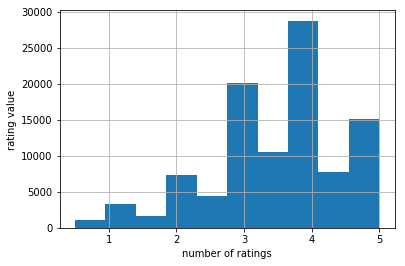

In [7]:
# Plot distribution of ratings using the pandas plot functionality
histogram = ratings['rating'].hist()
histogram.set_xlabel('number of ratings')
histogram.set_ylabel('rating value')

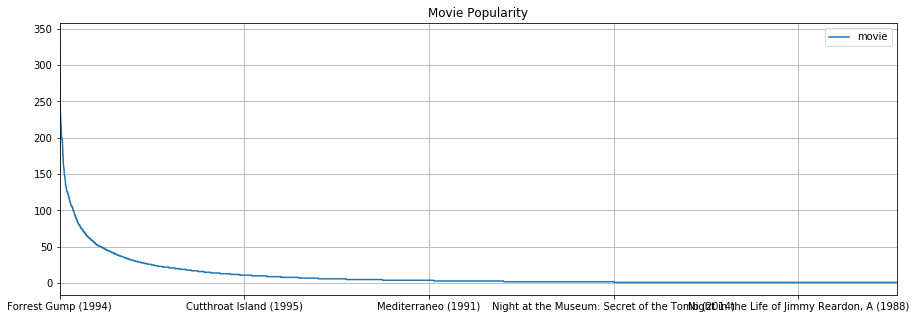

In [8]:
# movie popularity distribution
popularity = pd.DataFrame(ratings['movie'].value_counts())
popularity.sort_values(by='movie', ascending=False)
popularity.plot(figsize=(15, 5), title="Movie Popularity").grid(True)

In [16]:
popularity.head(100)

,movie
Forrest Gump (1994),341
Pulp Fiction (1994),324
"Shawshank Redemption, The (1994)",311
"Silence of the Lambs, The (1991)",304
Star Wars: Episode IV - A New Hope (1977),291
Jurassic Park (1993),274
"Matrix, The (1999)",259
Toy Story (1995),247
Schindler's List (1993),244
Terminator 2: Judgment Day (1991),237


In [17]:
popularity.tail(100)

,movie
American Heist (2015),1
Tarzan and His Mate (1934),1
Valhalla Rising (2009),1
"Sacrament, The (2013)",1
Dead or Alive: Hanzaisha (1999),1
Looking for Mr. Goodbar (1977),1
"Taste of Others, The (Le goût des autres) (2000)",1
Little Dieter Needs to Fly (1997),1
Born Rich (2003),1
The Overnight (2015),1


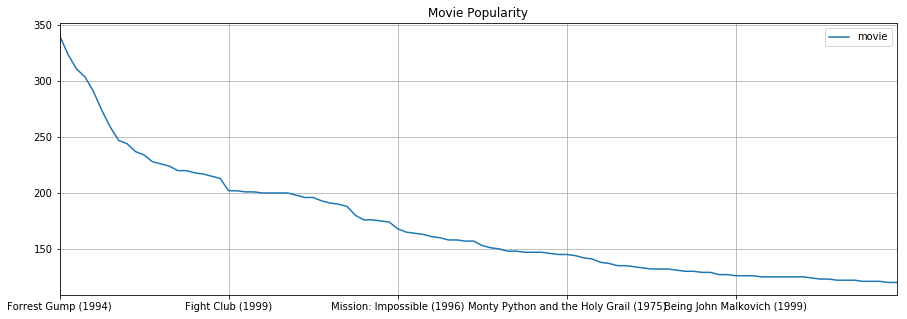

In [18]:
# movie popularity distribution: zoom into the top-100 movies
popularity[0:100].plot(figsize=(15, 5), title="Movie Popularity").grid(True)